In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

longitudinal_data = pd.read_csv('oasis_longitudinal.csv')
longitudinal_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
# Checking for duplicates by MRI ID -> no duplicates

print(longitudinal_data.duplicated(subset=['MRI ID']).sum())

0


In [3]:
#Checking columns with missing values

cols_with_missing_vals = longitudinal_data.columns[longitudinal_data.isna().sum() > 0]

print(cols_with_missing_vals)
print('Number of rows with missing SES values: ' + str(longitudinal_data['SES'].isna().sum()))
print('Number of rows with missing MMSE values: ' + str(longitudinal_data['MMSE'].isna().sum()))

Index(['SES', 'MMSE'], dtype='object')
Number of rows with missing SES values: 19
Number of rows with missing MMSE values: 2


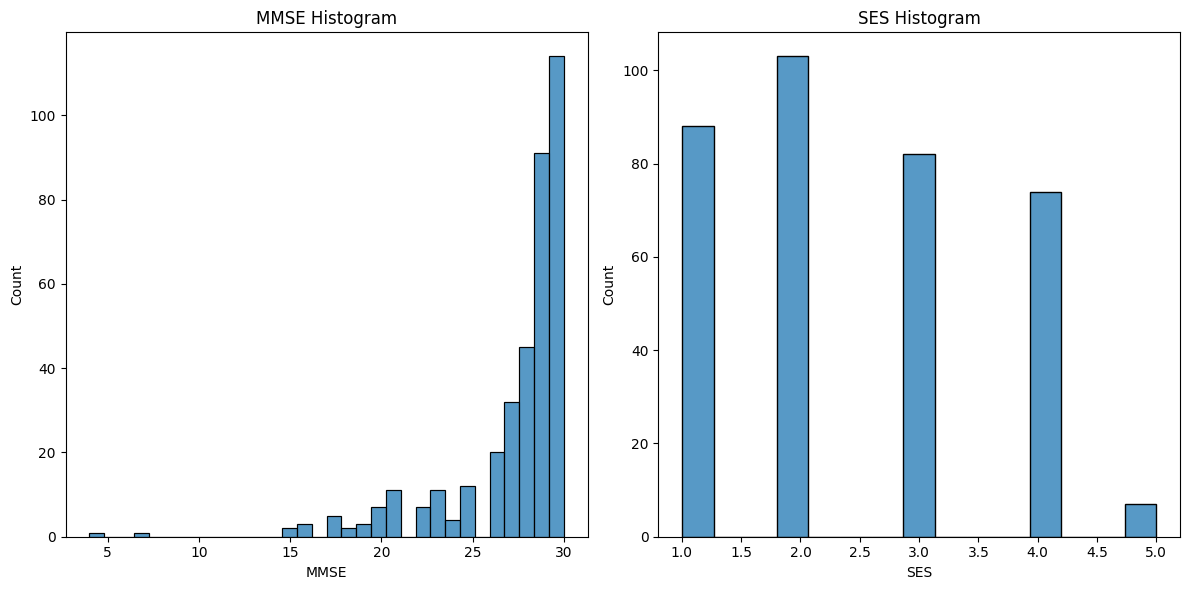

In [4]:
# Checking SES and MMSE columns distributions

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=longitudinal_data['MMSE'], ax=axes[0])
axes[0].set_title('MMSE Histogram')

sns.histplot(data=longitudinal_data['SES'], ax=axes[1])
axes[1].set_title('SES Histogram')

plt.tight_layout()
plt.show()

In [5]:
# Imputing missing values in SES and MMSE columns with SimpleImputer
# Imputing MMSE with median as it's left skewed, Imputing SES with mode as it's categorical

mmse_imputer = SimpleImputer(strategy='median')
longitudinal_data['MMSE'] = mmse_imputer.fit_transform(longitudinal_data[['MMSE']])

ses_imputer = SimpleImputer(strategy='most_frequent')
longitudinal_data['SES'] = ses_imputer.fit_transform(longitudinal_data[['SES']])

print(longitudinal_data.columns.isna()) # Imputed, no missing values

[False False False False False False False False False False False False
 False False False]


In [6]:
longitudinal_data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.436997,27.351206,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.109307,3.675329,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


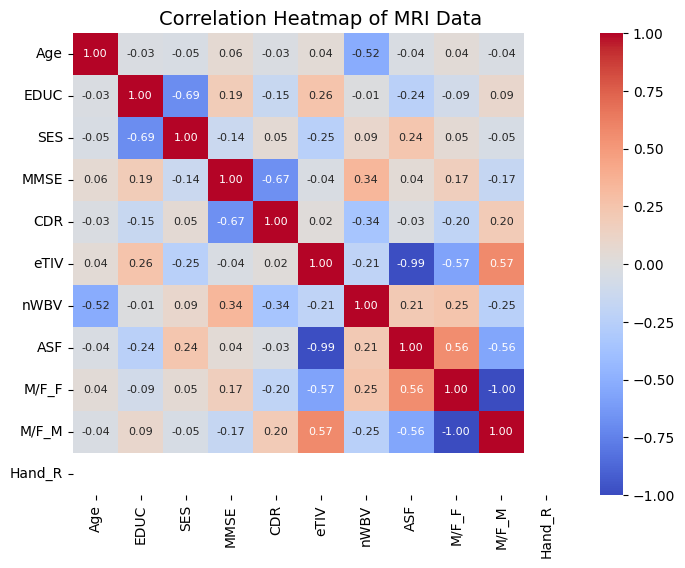

In [11]:
# Dropping columns that are not needed to predict CDR value
long_data = longitudinal_data.drop(columns=['Subject ID','MRI ID','Group','Visit','MR Delay'])

# Columns to dummy
columns_to_dummy = ['M/F', 'Hand']
long_data_dummy = pd.get_dummies(long_data, columns = columns_to_dummy)

# Correlation matrix
correlation_matrix = long_data_dummy.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heatmap of MRI Data', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()